# Brain Tumor Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Dense, Flatten
%matplotlib inline


from sklearn.utils import shuffle

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Miscellaneous
from tqdm import tqdm
import os
import pandas as pd
import random

In [2]:
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training/'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [3]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

In [4]:


# Building model
classifier = Sequential()

classifier.add(Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)))
classifier.add(MaxPool2D(2,2))

classifier.add(Conv2D(100, (3,3), activation='relu'))
classifier.add(MaxPool2D(2,2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(4, activation='softmax'))

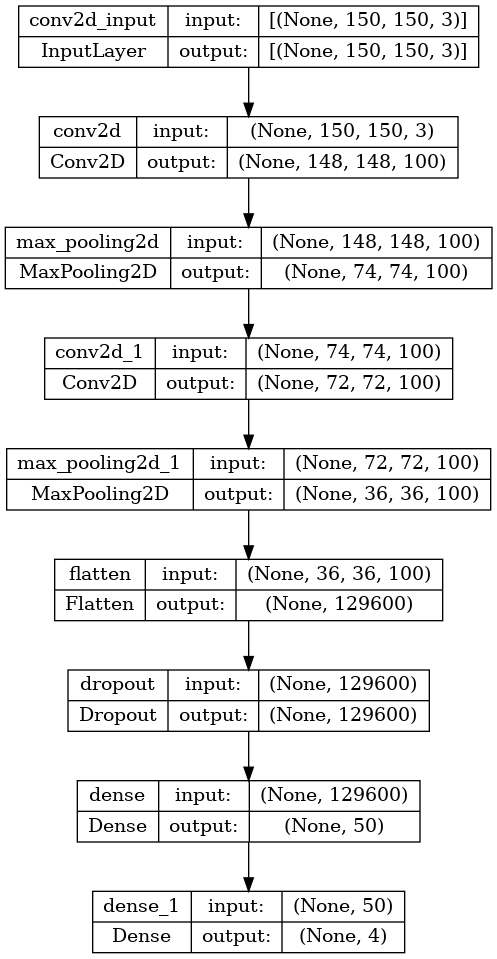

In [5]:
tf.keras.utils.plot_model(classifier, show_shapes=True)

In [6]:
# Model Summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dropout (Dropout)           (None, 129600)            0

In [7]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
# Loading data and Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/kaggle/input/brain-tumor-mri-dataset/Training', 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/kaggle/input/brain-tumor-mri-dataset/Testing', 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
# Model Checkpointing
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [10]:
# Training Model
history = classifier.fit(train_generator,
                                   epochs=10,
                                   validation_data=validation_generator,
                                   callbacks=[checkpoint],)

Epoch 1/10
572/572 [==============================] - 62s 94ms/step - loss: 0.2556 - accuracy: 0.7885 - val_loss: 0.2050 - val_accuracy: 0.8482
Epoch 2/10
572/572 [==============================] - 26s 45ms/step - loss: 0.1222 - accuracy: 0.9181 - val_loss: 0.1527 - val_accuracy: 0.9031
Epoch 3/10
572/572 [==============================] - 25s 44ms/step - loss: 0.0757 - accuracy: 0.9526 - val_loss: 0.1031 - val_accuracy: 0.9268
Epoch 4/10
572/572 [==============================] - 25s 44ms/step - loss: 0.0459 - accuracy: 0.9741 - val_loss: 0.1107 - val_accuracy: 0.9352
Epoch 5/10
572/572 [==============================] - 26s 46ms/step - loss: 0.0341 - accuracy: 0.9807 - val_loss: 0.0834 - val_accuracy: 0.9611
Epoch 6/10
572/572 [==============================] - 25s 44ms/step - loss: 0.0177 - accuracy: 0.9905 - val_loss: 0.0958 - val_accuracy: 0.9588
Epoch 7/10
572/572 [==============================] - 25s 43ms/step - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.1046 - val_accuracy:

In [ ]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")

In [ ]:
# Model Evaluation
classifier.evaluate(validation_generator)

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))